In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the Datasets

In [73]:
data = pd.read_csv('/content/customer_booking.csv', encoding='latin1')

In [74]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


Checking the columns with Null Values

In [75]:
data.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

Checking the unique values each columns have

In [76]:
data.nunique()

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

Checking the datatypes of each columns

In [77]:
data.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

creating a list of columns with categorical value and a large number of unique values and dropping that column

In [78]:
categorical_data_column = ['route','booking_origin']
data.drop(columns=categorical_data_column, inplace=True)

In [79]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,1,0,1,5.52,0


Mapping the data in columns

In [80]:
data['sales_channel'] = data['sales_channel'].map({'Internet':1,'Mobile':0})
data['trip_type'] = data['trip_type'].map({'RoundTrip':1,'OneWay':0,'CircleTrip':2})
data['flight_day'] = data['flight_day'].map({'Mon':0,'Fri':1,'Sat':2,'Sun':3,'Thu':4,'Wed':5,'Tue':6})

In [81]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,1,262,19,7,2,1,0,0,5.52,0
1,1,1,1,112,20,3,2,0,0,0,5.52,0
2,2,1,1,243,22,17,5,1,1,0,5.52,0
3,1,1,1,96,31,4,2,0,0,1,5.52,0
4,2,1,1,68,22,15,5,1,0,1,5.52,0


Seperating features and Target

In [82]:
X = data.drop(['booking_complete'],axis=1)    #Features
y = data['booking_complete']         #Target
X.shape,y.shape

((50000, 11), (50000,))

In [83]:
X.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,1,1,262,19,7,2,1,0,0,5.52
1,1,1,1,112,20,3,2,0,0,0,5.52
2,2,1,1,243,22,17,5,1,1,0,5.52
3,1,1,1,96,31,4,2,0,0,1,5.52
4,2,1,1,68,22,15,5,1,0,1,5.52


Now we will Split the data in train test split

In [84]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,y, random_state = 42, stratify=y)

Scaling the Data using Min Max Scaler

In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

In [87]:
# Fit and transform the data using the scaler
# Fit and transform the scaler on training data
X_train_scaled = scaler.fit_transform(train_x)
# Transform the test data using the same scaler
X_test_scaled = scaler.transform(test_x)

In [88]:
train_scaled = pd.DataFrame(X_train_scaled)
test_scaled = pd.DataFrame(X_test_scaled)

In [89]:
train_scaled.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

Implenting The Random Forest Model

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

initializing the model

In [91]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

Fitting the train data in model

In [92]:
rf_classifier.fit(train_scaled, train_y)

RandomForestClassifier(random_state=42)

predicting the test data

In [93]:
y_pred = rf_classifier.predict(test_scaled)

Evaluating The Model

In [94]:
accuracy = accuracy_score(test_y, y_pred)
classification_report_result = classification_report(test_y, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report_result)

Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     10631
           1       0.43      0.06      0.10      1869

    accuracy                           0.85     12500
   macro avg       0.64      0.52      0.51     12500
weighted avg       0.79      0.85      0.79     12500



Plotting the Model

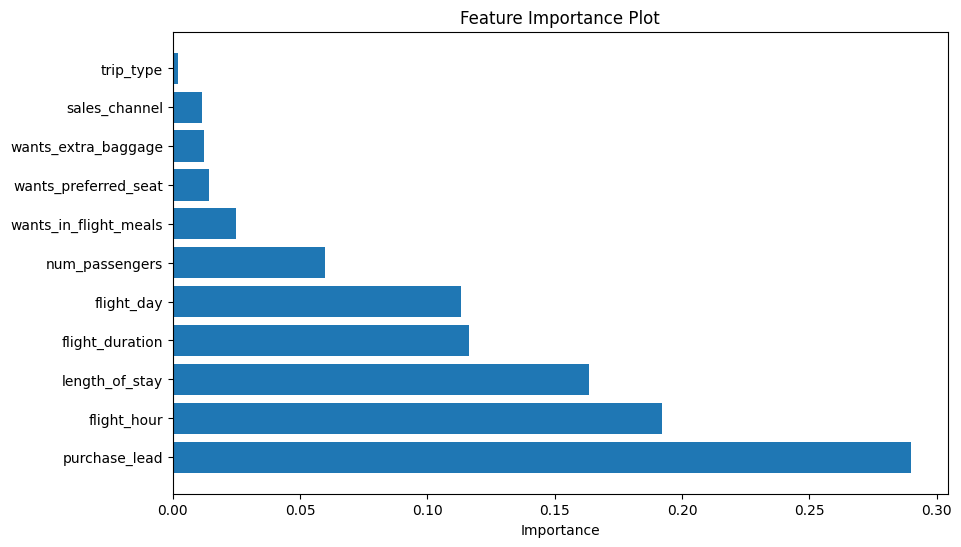

In [95]:
# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Creating a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance Plot')
plt.show()

Creating a confusion matrix

In [96]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

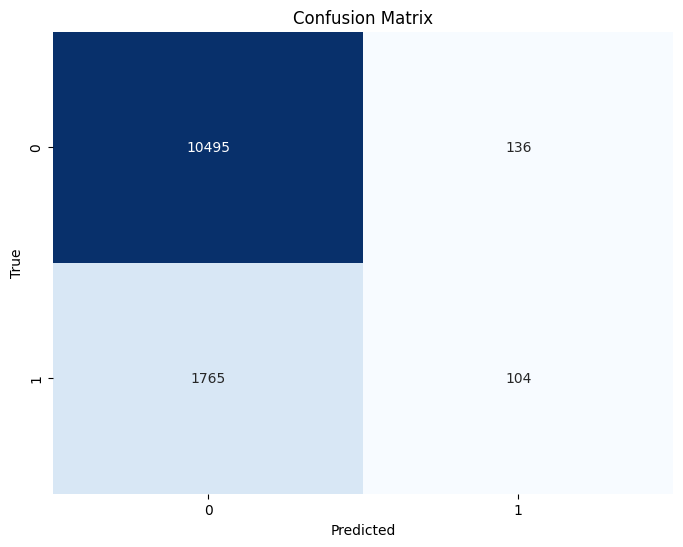

In [97]:
# Create a confusion matrix
conf_matrix = confusion_matrix(test_y, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Plotting a ROC Curve

In [98]:
from sklearn.metrics import roc_curve, auc

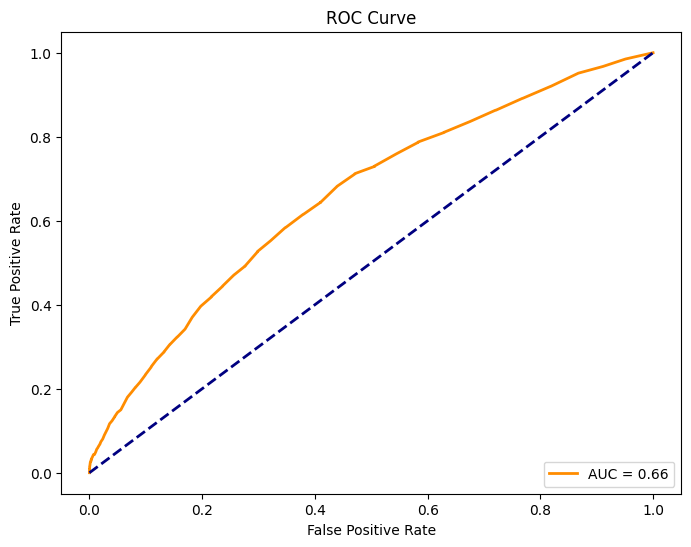

In [99]:
# Get the predicted probabilities for the positive class
y_probs = rf_classifier.predict_proba(test_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(test_y, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()